<div class="alert alert-info">
    <h2 align="center"> Week 10: Deep Learning And Convolutional Neural Network</h2>
    <h3 align="center"><a href="http://www.snrazavi.ir">Seyed Naser RAZAVI</a></h3>
</div>

# Recall
- **Machine Learning:** Data + Model + Optimization

### Data:
- **Image Data:** CIFAR-10

### Model
- **Linear classification:** linear score function
- **Non-linear classification:** Multi-layer Neural Networks

### Optimization
- **Loss function:** SVM or Softmax
- **Optimization:** Gradient Decsent, SGD, SGD + momentum, etc.
- **Backpropagation:** Computing gradients using chain rule
- **Techniques:** Regularization, Batch Normalization, Dropout, Data Augmentation, etc.

# Today's Topics
- Introduction to CNN
- Introduction to Keras
- Implementing CNN Using Keras 

<img align="left" src="imgs/Keras.png" width="30%"/>

# Why Keras?
- A very simple and popular framework for **Deep Learning**: (2nd place, 2017)
- It is easy to learn and easy to use.
- Very flexible and powerfull: it works on top of **Tensorflow** from Google.

For more information, please see <a href="https://keras.io">here</a>.

<img src="imgs/DL-frameworks.png" width="75%"/>

## How to install Keras
- If you are using anaconda distribution for python, installing Keras is a very simple task.
- Just type the following in the command prompt:

#### GPU version:
<code>
> conda install -c anaconda keras-gpu
</code>

#### CPU version:
<code>
> conda install -c anaconda keras
</code>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
image_size = 32
num_channels = 3
num_features = image_size * image_size * num_channels
num_classes = 10

num_train = 49000

# Load CIFAR10 Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

Train data shape: (50000, 32, 32, 3)
Test  data shape: (10000, 32, 32, 3)


## Data Visualization

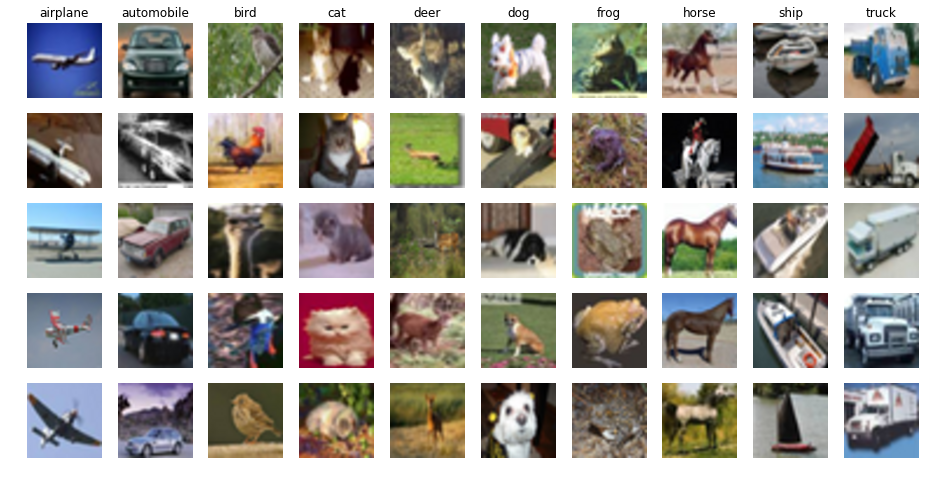

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 5

plt.figure(figsize=(16, 8))

for cls, name in enumerate(class_names):
    idxs = np.flatnonzero(y_train == cls)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(samples_per_class, num_classes, i * num_classes + cls + 1)
        plt.imshow(X_train[idx], interpolation='spline16')
        plt.axis('off')
        if i == 0:
            plt.title(class_names[cls])

## Data Preprocessing

In [5]:
# Convert 4D arrays to 2D arrays
X_train = X_train.reshape([-1, num_features])
X_test  =  X_test.reshape([-1, num_features])

print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

Train data shape: (50000, 3072)
Test  data shape: (10000, 3072)


In [6]:
# convert pixel range from [0, 255] to [0., 1.]
X_train = X_train.astype('float32')
x_test  = X_test.astype('float32')

mu = np.mean(X_train, axis=0)

X_train -= mu
X_train /= 255.0

x_test -= mu
x_test /= 255.0

## One-hot encodding
- We have 10 classes: 0, 1, ..., 9

In one-hot encoding, we represent labels using vectors.

```python
0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
.
.
.
9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
```

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


# Linear Classifier

## $$f(x, W, b) = Wx+b$$

<img src="imgs/linear_classifier.jpg" width="75%"/>

In [8]:
model = Sequential()  # a sequence of layers
model.add(Dense(num_classes, input_shape=(num_features,), activation='softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [10]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train[:num_train], y_train[:num_train], 
                    batch_size=512, 
                    epochs=15,
                    verbose=2,
                    validation_data=(X_train[num_train:], y_train[num_train:]),
                    shuffle=True)

Train on 49000 samples, validate on 1000 samples
Epoch 1/15
3s - loss: 2.1106 - acc: 0.2346 - val_loss: 2.0220 - val_acc: 0.2940
Epoch 2/15
1s - loss: 1.9707 - acc: 0.3085 - val_loss: 1.9518 - val_acc: 0.3330
Epoch 3/15
1s - loss: 1.9177 - acc: 0.3348 - val_loss: 1.9122 - val_acc: 0.3540
Epoch 4/15
1s - loss: 1.8861 - acc: 0.3512 - val_loss: 1.8897 - val_acc: 0.3700
Epoch 5/15
1s - loss: 1.8643 - acc: 0.3609 - val_loss: 1.8700 - val_acc: 0.3760
Epoch 6/15
1s - loss: 1.8480 - acc: 0.3666 - val_loss: 1.8574 - val_acc: 0.3770
Epoch 7/15
1s - loss: 1.8351 - acc: 0.3719 - val_loss: 1.8464 - val_acc: 0.3890
Epoch 8/15
1s - loss: 1.8244 - acc: 0.3761 - val_loss: 1.8381 - val_acc: 0.3890
Epoch 9/15
1s - loss: 1.8154 - acc: 0.3799 - val_loss: 1.8317 - val_acc: 0.3960
Epoch 10/15
1s - loss: 1.8077 - acc: 0.3822 - val_loss: 1.8244 - val_acc: 0.4010
Epoch 11/15
1s - loss: 1.8010 - acc: 0.3835 - val_loss: 1.8180 - val_acc: 0.4010
Epoch 12/15
1s - loss: 1.7950 - acc: 0.3867 - val_loss: 1.8129 - val_

In [12]:
model.save('Linear-model.h5')

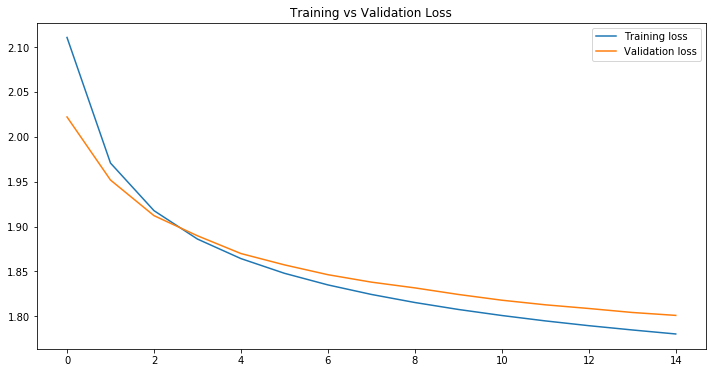

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

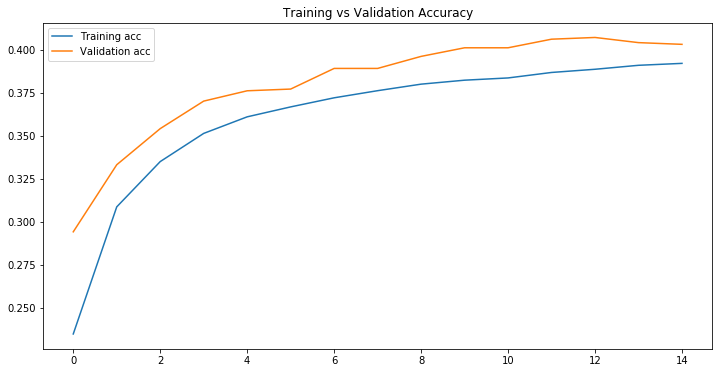

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['acc'], label="Training acc")
plt.plot(history.history['val_acc'], label="Validation acc")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

## Predicting class for new images

In [17]:
# Select 25 random images from test images
idx = np.random.choice(x_test.shape[0], 25, replace=False)

# predict class for selected images
y_pred = model.predict_classes(x_test[idx])

# True class for selected images
y_true = y_test[idx].argmax(axis=1)

print('Test Accuracy = %.2f' % (100.0 * np.mean(y_pred == y_true)))

25/25 [==============================] - 0s
Test Accuracy = 36.00


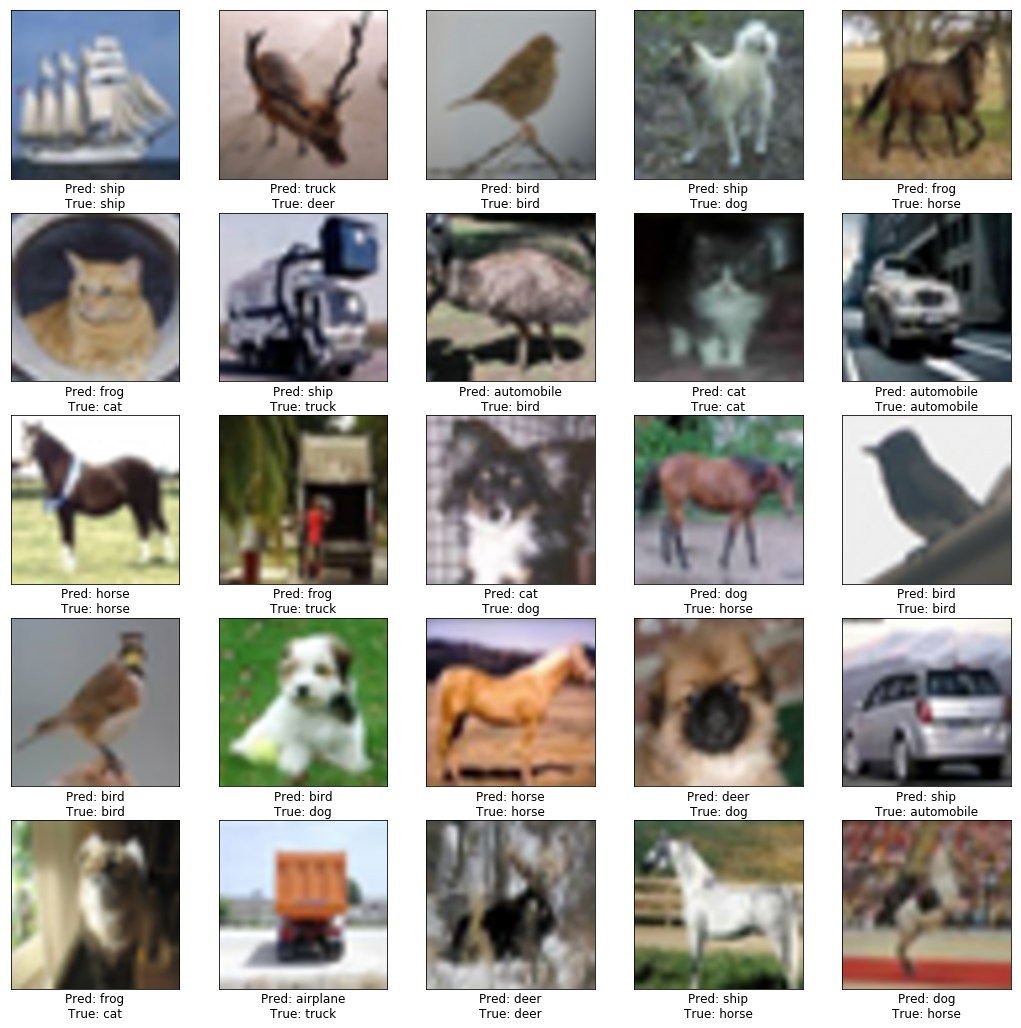

In [18]:
fig, axes = plt.subplots(5, 5, figsize=(18, 18))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[idx[i]].reshape(image_size, image_size, num_channels), interpolation='spline16')
    pred_class = class_names[y_pred[i]]
    true_class = class_names[y_true[i]]
    ax.set_xlabel('Pred: {}\nTrue: {}'.format(pred_class, true_class), fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])

# Multi-layer Neural Network

### $$f(x) = W_3 \times \max(W_2 \times \max(0, W_1 x))$$

<img src="imgs/neural_net2.jpeg" width="50%"/>

In [23]:
model = Sequential()

# First hidden Layer
model.add(Dense(units=100, input_shape=(num_features,)))
model.add(Activation(activation='relu'))

# Second hidden Layer
model.add(Dense(units=100))
model.add(Activation(activation='relu'))

model.add(Dense(units=100, input_shape=(num_features,)))
model.add(Activation(activation='relu'))


# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               307300    
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total para

### Training the model

In [25]:
optimizer = keras.optimizers.RMSprop(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Train on 49000 samples, validate on 1000 samples
Epoch 1/15
49000/49000 [==============================] - 2s - loss: 1.6974 - acc: 0.3963 - val_loss: 1.6420 - val_acc: 0.4180
Epoch 2/15
49000/49000 [==============================] - 2s - loss: 1.4915 - acc: 0.4736 - val_loss: 1.5431 - val_acc: 0.4570
Epoch 3/15
49000/49000 [==============================] - 2s - loss: 1.3959 - acc: 0.5070 - val_loss: 1.4813 - val_acc: 0.4800
Epoch 4/15
49000/49000 [==============================] - 2s - loss: 1.3265 - acc: 0.5319 - val_loss: 1.4546 - val_acc: 0.5000
Epoch 5/15
49000/49000 [==============================] - 2s - loss: 1.2701 - acc: 0.5524 - val_loss: 1.4300 - val_acc: 0.4990
Epoch 6/15
49000/49000 [==============================] - 2s - loss: 1.2218 - acc: 0.5703 - val_loss: 1.3704 - val_acc: 0.5120
Epoch 7/15
49000/49000 [==============================] - 2s - loss: 1.1764 - acc: 0.5859 - val_loss: 1.3827 - val_acc: 0.5300
Epoch 8/15
49000/49000 [==============================] - 2s -

In [27]:
model.save('nn.h5')
# model = keras.models.load_model('nn.h5')

## Adding Dropout and Batch Normalization

In [29]:
from keras.layers import BatchNormalization, Dropout

In [30]:
model = Sequential()

# First Hidden Layer
model.add(Dense(units=100, input_shape=(num_features,)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Second Hidden Layer
model.add(Dense(units=100))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

# print model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               307300    
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation_6 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
activation_7 (Activation)    (None, 100)               0         
__________

### Training the model

In [31]:
optimizer = keras.optimizers.Adam(lr=0.02, decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Train on 49000 samples, validate on 1000 samples
Epoch 1/15
49000/49000 [==============================] - 4s - loss: 1.8122 - acc: 0.3463 - val_loss: 1.5976 - val_acc: 0.4100
Epoch 2/15
49000/49000 [==============================] - 2s - loss: 1.6360 - acc: 0.4112 - val_loss: 1.4857 - val_acc: 0.4740
Epoch 3/15
49000/49000 [==============================] - 2s - loss: 1.5668 - acc: 0.4386 - val_loss: 1.4583 - val_acc: 0.4790
Epoch 4/15
49000/49000 [==============================] - 2s - loss: 1.5108 - acc: 0.4589 - val_loss: 1.3945 - val_acc: 0.4880
Epoch 5/15
49000/49000 [==============================] - 2s - loss: 1.4763 - acc: 0.4712 - val_loss: 1.3879 - val_acc: 0.5010
Epoch 6/15
49000/49000 [==============================] - 2s - loss: 1.4437 - acc: 0.4817 - val_loss: 1.3612 - val_acc: 0.5120
Epoch 7/15
49000/49000 [==============================] - 2s - loss: 1.4144 - acc: 0.4916 - val_loss: 1.3596 - val_acc: 0.5060
Epoch 8/15
49000/49000 [==============================] - 2s -

In [33]:
model.save('nn-dropout-bn.h5')
# model = keras.models.load_model('nn-dropout-bn.h5')

In [34]:
model.evaluate(x_test, y_test, batch_size=256)

 9984/10000 [============================>.] - ETA: 0s

[1.3323312149047852, 0.52249999999999996]

# Convolutional Neural Networks

<img src="imgs/CNN.png" width="75%"/>

<img src="imgs/cnn_flowchart.png" width="100%"/>

## Convolution layer

<img src="imgs/conv_layer.gif" width="80%"/>

## Pooling layer

<img src="imgs/maxpool.jpeg" width="60%"/>

### Visualization and Underestanding CNN
See This <a href="https://www.youtube.com/watch?v=ghEmQSxT6tw&t=1001s">video from Matt Zeiler</a> for a better understanding of convolutional neural network.

In [35]:
%%HTML
<iframe width="854" height="480" src="https://www.youtube.com/embed/ghEmQSxT6tw" frameborder="0" gesture="media" allow="encrypted-media" allowfullscreen></iframe>

## Converting dataset to 4D array

In [37]:
X_train = X_train.reshape((-1, image_size, image_size, num_channels))
X_test  =  X_test.reshape((-1, image_size, image_size, num_channels))
x_test  =  x_test.reshape((-1, image_size, image_size, num_channels))

In [38]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [39]:
def create_cnn():
    model = Sequential()

    # Conv Block 1
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 2
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 3
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Classifier
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

model = create_cnn()

#print model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
__________

In [40]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=200,
          epochs=1,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Train on 49000 samples, validate on 1000 samples
Epoch 1/1
49000/49000 [==============================] - 30s - loss: 1.6946 - acc: 0.3664 - val_loss: 1.2854 - val_acc: 0.5420


## Data Augmentation

In [41]:
model = create_cnn()
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
from keras.preprocessing.image import ImageDataGenerator

epochs = 5
batch_size = 256
data_augmentation = True


if not data_augmentation:
    print('Training without data augmentation.')
    model.fit(X_train[:num_train], y_train[:num_train], 
              batch_size=batch_size, 
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
else:
    print('Training using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range=0, 
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=True, 
        vertical_flip=False)
    
    datagen.fit(X_train[:num_train])
    
    model.fit_generator(datagen.flow(X_train[:num_train], y_train[:num_train], batch_size=batch_size),
                        steps_per_epoch=num_train//batch_size,
                        epochs=epochs,
                        validation_data=(X_train[num_train:], y_train[num_train:]))

Training using real-time data augmentation.
Epoch 1/5
191/191 [==============================] - 27s - loss: 1.7657 - acc: 0.3314 - val_loss: 1.3587 - val_acc: 0.5080
Epoch 2/5
191/191 [==============================] - 26s - loss: 1.3259 - acc: 0.5159 - val_loss: 1.1151 - val_acc: 0.6010
Epoch 3/5
191/191 [==============================] - 46s - loss: 1.1053 - acc: 0.6056 - val_loss: 0.8465 - val_acc: 0.7070
Epoch 4/5
191/191 [==============================] - 66s - loss: 0.9573 - acc: 0.6632 - val_loss: 0.7787 - val_acc: 0.7280
Epoch 5/5
191/191 [==============================] - 67s - loss: 0.8522 - acc: 0.7029 - val_loss: 0.6933 - val_acc: 0.7560


### Saving and Loading model

In [ ]:
# model.save('cnn_data_augmentation.h5')

In [43]:
model = keras.models.load_model('cnn_data_augmentation.h5')

In [44]:
model.evaluate(x_test, y_test, batch_size=250)

 9750/10000 [============================>.] - ETA: 0s

[0.39759900718927382, 0.8695000141859055]

## Predicting class for new images

In [45]:
y_test = np.argmax(y_test, axis=1) # to 0, 1, ..., 9

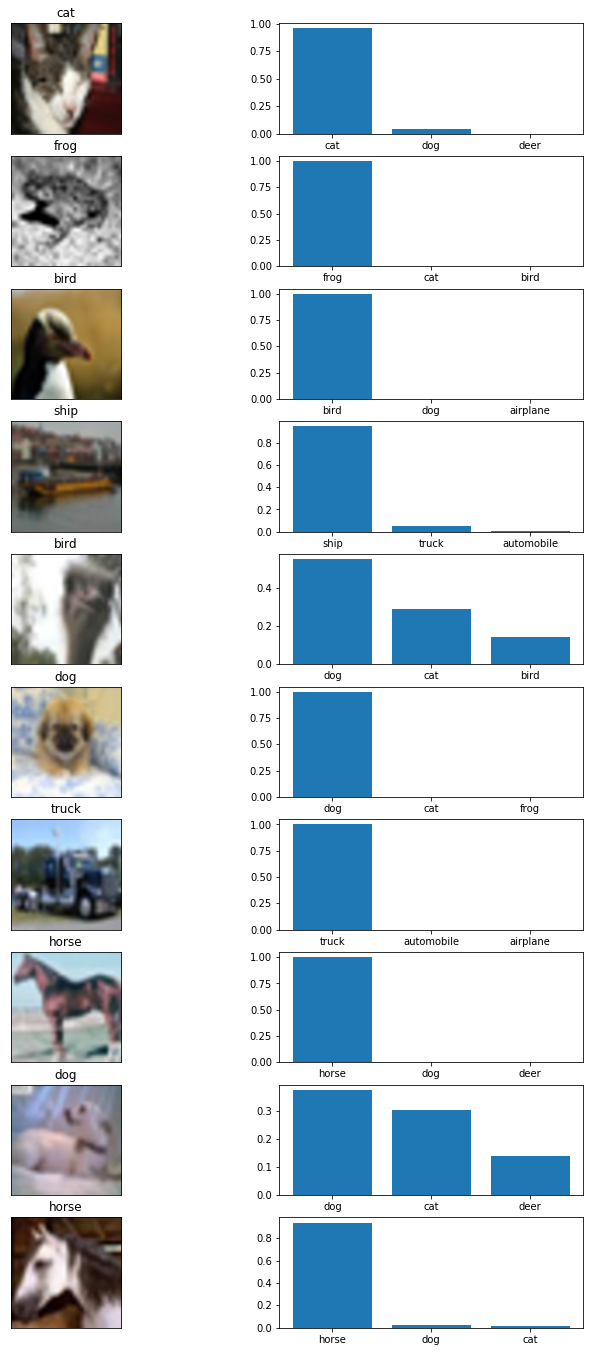

In [46]:
plt.figure(figsize=(12, 24))
idx = np.random.choice(len(x_test), 10, replace=False)

p = model.predict(x_test[idx])

for i in range(len(idx)):
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(X_test[idx[i]], interpolation='spline16')
    plt.title(class_names[y_test[idx[i]]])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred_label = np.argsort(-p[i])[:3]
    pred_prob = [p[i][l] for l in pred_label]
    pred_label = [class_names[l] for l in pred_label]
    
    plt.subplot(10, 2, 2*i+2)
    plt.bar(range(3), pred_prob)
    plt.xticks(range(3), pred_label)

plt.show()

# Last Word
- Solve problems (<a href="www.kaggle.com">Kaggle</a> is a very good place to start)
- Read papers
- Write about your experiments (both failure and success)
- Attend in my Deep Learning workshop (within 4 to 6 weeks)

# What will be covered in DL workshop?
- A framework for coding (Tensorflow, pyTorch, Keras)
- Convolutional Neural Networks (a deeper look)
- Recurrent Neural Networks for temporal data (text, speech, video)
- Generative Models
- Deep reinforcement Learning (robotics, game, self-driving cars)
- Some applications (Image Captioning, Sentiment Analysis, Machine Translation, etc.)

See you soon!